# Stuff to add

- 2 week mvg avg cases_confirmed
- cases per capita

# Thing to Consider 

- counties w/o deceased columns, for example, won't yield accurate results
    - Gil is eliminating those counties in its entirety

In [1]:
import pandas as pd
import glob
import numpy as np

# Set pandas option to display all columns
pd.set_option('display.max_columns', None)

import os

# path to csvs to add columns
folder_path = '../Custom Field Test CSVs/'

In [18]:
# Rename 
# Loop over each file in the directory
for filename in os.listdir(folder_path):
    # Check if the file is a CSV
    if filename.endswith('.csv'):
        # Construct the full file path
        file_path = os.path.join(folder_path, filename)
        
        # Read the CSV file into a DataFrame
        rename_df = pd.read_csv(file_path)
        
        # Rename columns
        rename_df.rename(columns={'subregion1_name': 'state_name', 'subregion2_name': 'county_name'}, inplace=True)
        
        # Save the modified DataFrame back to a new file or overwrite the existing one
        # If you want to create a new file instead of overwriting, adjust the `output_file_path`
        output_file_path = file_path  # This overwrites the original file
        # output_file_path = os.path.join(folder_path, 'modified_' + filename)  # To save as a new file
        
        rename_df.to_csv(output_file_path, index=False)  # Set `index=False` to avoid writing row indices

print("State & County column rename complete.")


State & County column rename complete.


In [13]:
import os
import pandas as pd

# Specify the directory containing the CSV files
directory = '../Custom Field Test CSVs'

# Loop through each file in the directory
for filename in os.listdir(directory):
    # Check if the file is a CSV file
    if filename.endswith('.csv') and filename.startswith('US_CO_'):
        # Construct the full path of the file
        file_path = os.path.join(directory, filename)
        
        # Read the county_name column from the CSV
        try:
            df = pd.read_csv(file_path, usecols=['county_name'])
            # Extract the first county name (assuming all rows have the same county name)
            county_name = df['county_name'].iloc[0]
            # Construct the new filename
            new_filename = f'US_CO_{county_name}.csv'
            new_file_path = os.path.join(directory, new_filename)
            
            # Rename the file
            os.rename(file_path, new_file_path)
            print(f'Renamed "{filename}" to "{new_filename}"')
        except Exception as e:
            print(f'Error processing {filename}: {e}')


Renamed "US_CO_08031.csv" to "US_CO_Denver County.csv"
Renamed "US_CO_08041.csv" to "US_CO_El Paso County.csv"
Renamed "US_CO_08019.csv" to "US_CO_Clear Creek County.csv"
Renamed "US_CO_08117.csv" to "US_CO_Summit County.csv"
Renamed "US_CO_08099.csv" to "US_CO_Prowers County.csv"
Renamed "US_CO_08111.csv" to "US_CO_San Juan County.csv"
Renamed "US_CO_08103.csv" to "US_CO_Rio Blanco County.csv"
Renamed "US_CO_08043.csv" to "US_CO_Fremont County.csv"
Renamed "US_CO_08083.csv" to "US_CO_Montezuma County.csv"
Renamed "US_CO_08027.csv" to "US_CO_Custer County.csv"
Renamed "US_CO_08051.csv" to "US_CO_Gunnison County.csv"
Renamed "US_CO_08063.csv" to "US_CO_Kit Carson County.csv"
Renamed "US_CO_08029.csv" to "US_CO_Delta County.csv"
Renamed "US_CO_08017.csv" to "US_CO_Cheyenne County.csv"
Renamed "US_CO_08091.csv" to "US_CO_Ouray County.csv"
Renamed "US_CO_08071.csv" to "US_CO_Las Animas County.csv"
Renamed "US_CO_08065.csv" to "US_CO_Lake County.csv"
Renamed "US_CO_08115.csv" to "US_CO_Sedg

In [3]:
# Define the window size for the moving average
window_size = 14  # For a two-week moving average

# Loop over each file in the directory
for filename in os.listdir(folder_path):
    # Check if the file is a CSV
    if filename.endswith('.csv'):
        # Construct the full file path
        file_path = os.path.join(folder_path, filename)
        
        # Read the CSV file into a DataFrame
        df_moving_avg = pd.read_csv(file_path)
        
        # Assuming the CSV has a 'new_deceased' column, calculate the moving average.
        # Adjust the code here to match your specific DataFrame structure and requirements.
        if 'new_deceased' in df.columns:
            df_moving_avg['two_week_avg_death'] = df_moving_avg['new_deceased'].rolling(window=window_size, min_periods=1).mean()
        else:
            df_moving_avg['two_week_avg_death'] = np.nan
        
        # Save the modified DataFrame back to a new file or overwrite the existing one
        # If you want to create a new file instead of overwriting, adjust the `output_file_path`
        output_file_path = file_path  # This overwrites the original file
        # output_file_path = os.path.join(folder_path, 'modified_' + filename)  # To save as a new file
        
        df_moving_avg.to_csv(output_file_path, index=False)  # Set `index=False` to avoid writing row indices

print("Two week moving avergage column addition complete.")


Two week moving avergage column addition complete.


In [5]:
columns_to_load = [
     'location_key'
    , 'date'
    , 'place_id'
    , 'wikidata_id'
    , 'datacommons_id'
    , 'country_code'
    , 'country_name'
    , 'subregion1_code'
    , 'state_name' # renamed subregion1_name to state_name
    , 'subregion2_code'
    , 'county_name ' # renamed subregion2_name to county_name
    , 'new_confirmed'
    , 'new_deceased'
    , 'cumulative_confirmed'
    , 'cumulative_deceased'
    , 'new_persons_fully_vaccinated'
    , 'cumulative_persons_fully_vaccinated'
    , 'population'
    , 'population_male'
    , 'population_female'
    , 'population_age_00_09'
    , 'population_age_10_19'
    , 'population_age_20_29'
    , 'population_age_30_39'
    , 'population_age_40_49'
    , 'population_age_50_59'
    , 'population_age_60_69'
    , 'population_age_70_79'
    , 'population_age_80_and_older'
    , 'openstreetmap_id'
    , 'latitude'
    , 'longitude'
    , 'area_sq_km'
    , 'life_expectancy'
    , 'mobility_retail_and_recreation'
    , 'mobility_grocery_and_pharmacy'
    , 'mobility_parks'
    , 'mobility_transit_stations'
    , 'mobility_workplaces'
    , 'mobility_residential'
    , 'average_temperature_celsius'
    , 'minimum_temperature_celsius'
    , 'maximum_temperature_celsius'
    , 'rainfall_mm'
    , 'dew_point'
    , 'relative_humidity'
    , 'two_week_avg_death'
]

In [16]:
# Directory path to your CSV files
directory_path = "../Custom Field Test CSVs/"  # Example directory path

# Initialize an empty DataFrame to store data from all CSV files
full_df = pd.DataFrame(columns=columns_to_load)

# Loop over the list of CSV files
for file in glob.glob(directory_path + 'US_NY*.csv'):
    # Read the CSV file without specifying columns to ensure we don't miss any data
    df = pd.read_csv(file)
    
    # Ensure all desired columns are present, add them with NaN values if they are missing
    for column in columns_to_load:
        if column not in df.columns:
            df[column] = np.nan

    # Reorder and select only the desired columns to maintain consistency
    df = df[columns_to_load]
    
    # Append the contents of the file to the full DataFrame
    df = pd.concat([full_df, df], ignore_index=True)

# Optionally, reset the index of the final DataFrame
df.reset_index(drop=True, inplace=True)



In [17]:
# Print each column name
for column in df.columns:
    print(column)

county_name


In [8]:
df['two_week_avg_death'].value_counts()

two_week_avg_death
 0.000000    446
 0.071429    146
 0.142857     83
 0.214286     51
 0.285714     30
 0.357143     14
 0.642857     10
-0.071429      8
 0.714286      2
 0.428571      2
 0.500000      1
 0.571429      1
Name: count, dtype: int64

In [15]:
df.head()

,county_name
0,Teller County
1,Teller County
2,Teller County
3,Teller County
4,Teller County


In [9]:
tolerance = 1e-6

# Use numpy.isclose for a comparison with tolerance
df[np.isclose(df['two_week_avg_death'], 0.642857, atol=tolerance)]

,location_key,date,place_id,wikidata_id,datacommons_id,country_code,country_name,subregion1_code,state_name,subregion2_code,county_name,iso_3166_1_alpha_2,iso_3166_1_alpha_3,aggregation_level,new_confirmed,new_deceased,cumulative_confirmed,cumulative_deceased,new_persons_fully_vaccinated,cumulative_persons_fully_vaccinated,population,population_male,population_female,population_age_00_09,population_age_10_19,population_age_20_29,population_age_30_39,population_age_40_49,population_age_50_59,population_age_60_69,population_age_70_79,population_age_80_and_older,openstreetmap_id,latitude,longitude,area_sq_km,life_expectancy,mobility_retail_and_recreation,mobility_grocery_and_pharmacy,mobility_workplaces,mobility_residential,search_trends_abdominal_pain,search_trends_acne,search_trends_allergy,search_trends_anxiety,search_trends_arthritis,search_trends_back_pain,search_trends_common_cold,search_trends_cough,search_trends_depression,search_trends_diabetes,search_trends_diarrhea,search_trends_fatigue,search_trends_fever,search_trends_headache,search_trends_hypertension,search_trends_infection,search_trends_inflammation,search_trends_itch,search_trends_migraine,search_trends_obesity,search_trends_pain,search_trends_skin_condition,search_trends_skin_rash,search_trends_swelling,search_trends_urinary_tract_infection,average_temperature_celsius,minimum_temperature_celsius,maximum_temperature_celsius,rainfall_mm,snowfall_mm,dew_point,relative_humidity,two_week_avg_death
671,US_CO_08119,2021-11-02,ChIJZfzYnp7KFIcRoA2ASNibwDk,Q312746,geoId/08119,US,United States of America,CO,Colorado,8119,Teller County,US,USA,2,22.0,2.0,2961.0,34.0,1.0,12566.0,24674,12551,12123,2195,2554,2170,2434,2833,4598,4980,2283,627,1411331,38.88,-105.15,1448,80.38,NaN,NaN,-14.0,4.0,5.63,5.93,10.67,11.56,NaN,NaN,15.11,5.93,NaN,13.63,NaN,5.93,5.04,NaN,8.89,18.67,4.45,4.45,4.15,4.74,32.30,4.15,5.33,7.70,NaN,1.361111,-3.122222,7.327778,0.036286,NaN,-2.194444,77.524369,0.642857
674,US_CO_08119,2021-11-05,ChIJZfzYnp7KFIcRoA2ASNibwDk,Q312746,geoId/08119,US,United States of America,CO,Colorado,8119,Teller County,US,USA,2,14.0,1.0,3006.0,36.0,17.0,12592.0,24674,12551,12123,2195,2554,2170,2434,2833,4598,4980,2283,627,1411331,38.88,-105.15,1448,80.38,16.0,-6.0,-11.0,4.0,NaN,NaN,9.18,8.20,5.90,NaN,11.81,4.92,5.25,7.21,5.90,NaN,NaN,4.59,5.90,21.65,7.54,NaN,5.25,NaN,33.12,NaN,NaN,NaN,6.23,9.750000,-0.511111,18.783333,0.000000,NaN,-7.883333,28.323873,0.642857
675,US_CO_08119,2021-11-06,ChIJZfzYnp7KFIcRoA2ASNibwDk,Q312746,geoId/08119,US,United States of America,CO,Colorado,8119,Teller County,US,USA,2,0.0,0.0,3006.0,36.0,15.0,12607.0,24674,12551,12123,2195,2554,2170,2434,2833,4598,4980,2283,627,1411331,38.88,-105.15,1448,80.38,2.0,NaN,-7.0,NaN,NaN,6.93,10.75,6.59,NaN,NaN,13.87,5.20,NaN,7.97,NaN,NaN,7.28,5.20,6.24,20.80,9.36,6.59,NaN,NaN,28.08,NaN,NaN,7.28,7.28,10.066667,0.900000,21.472222,0.000000,NaN,-11.583333,21.016997,0.642857
676,US_CO_08119,2021-11-07,ChIJZfzYnp7KFIcRoA2ASNibwDk,Q312746,geoId/08119,US,United States of America,CO,Colorado,8119,Teller County,US,USA,2,0.0,0.0,3006.0,36.0,15.0,12622.0,24674,12551,12123,2195,2554,2170,2434,2833,4598,4980,2283,627,1411331,38.88,-105.15,1448,80.38,9.0,NaN,-8.0,NaN,NaN,4.85,9.71,8.73,4.85,4.85,9.06,6.47,4.53,7.76,NaN,NaN,5.18,5.18,NaN,19.09,4.85,NaN,4.85,NaN,33.32,NaN,7.12,6.15,NaN,13.288889,3.744444,21.466667,0.000000,NaN,-12.533333,15.865589,0.642857
678,US_CO_08119,2021-11-09,ChIJZfzYnp7KFIcRoA2ASNibwDk,Q312746,geoId/08119,US,United States of America,CO,Colorado,8119,Teller County,US,USA,2,11.0,1.0,3040.0,38.0,0.0,12635.0,24674,12551,12123,2195,2554,2170,2434,2833,4598,4980,2283,627,1411331,38.88,-105.15,1448,80.38,NaN,NaN,-9.0,2.0,NaN,5.18,9.46,4.58,4.27,6.41,12.51,4.58,4.58,7.93,4.27,NaN,4.27,NaN,7.32,22.88,9.76,NaN,NaN,NaN,32.33,NaN,NaN,5.79,NaN,4.527778,-2.583333,15.061111,0.000000,NaN,-4.005556,54.674871,0.642857
679,US_CO_08119,2021-11-10,ChIJZfzYnp7KFIcRoA2ASNibwDk,Q312746,geoId/08119,US,United States of America,CO,Colorado,8

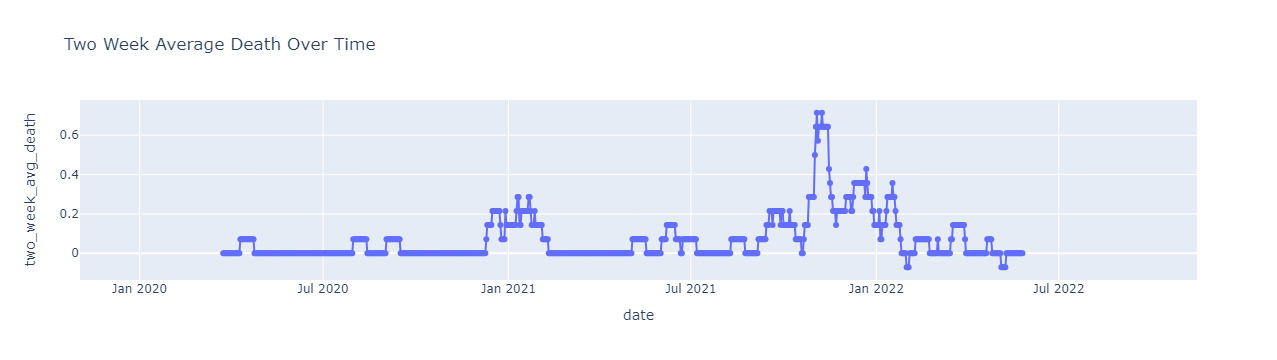

In [21]:
# since I found that teller county contains the rows with 0.642... mvg avg deaths, plot this county

import plotly.express as px

# Load the data
df_plot = pd.read_csv('../Custom Field Test CSVs/US_CO_Teller County.csv')

# Ensure the date column is formatted as a date type (assuming the date column is named 'Date')
df_plot['date'] = pd.to_datetime(df_plot['date'])

# Create an interactive line plot
fig = px.line(df_plot, x='date', y='two_week_avg_death', title='Two Week Average Death Over Time')

# Customize hover data
fig.update_traces(mode='lines+markers', hoverinfo='text+name', text=df_plot['date'].dt.strftime('%Y-%m-%d'))

# Show the plot
fig.show()


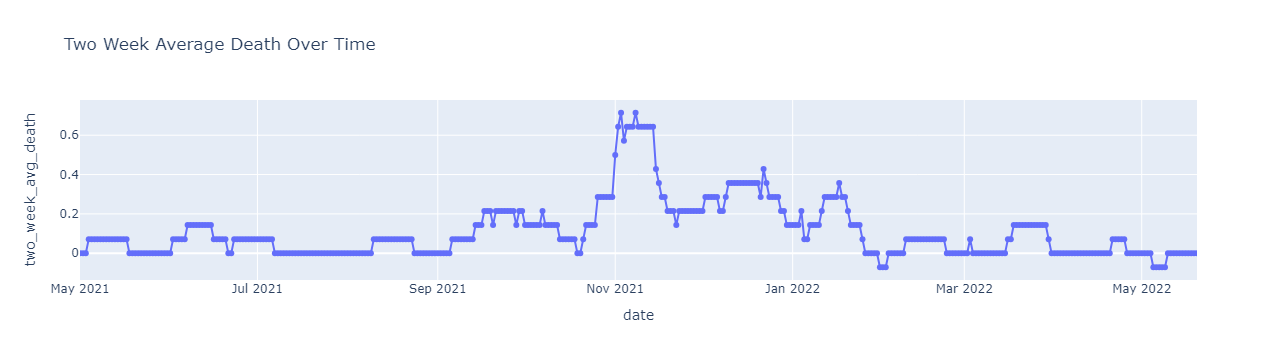

In [22]:

# Create an interactive line plot

# since I found that teller county contains the rows with 0.642... mvg avg deaths, plot this county

fig = px.line(df_plot, x='date', y='two_week_avg_death', title='Two Week Average Death Over Time')

# Set the date range for the x-axis
fig.update_xaxes(range=['2021-05-01', '2022-05-20'])

# Customize hover data
fig.update_traces(mode='lines+markers', hoverinfo='text+name', text=df_plot['date'].dt.strftime('%Y-%m-%d'))

# Show the plot
fig.show()

In [23]:
# convert date column to datetime (comment back in if cell not running; only needs to be run once)
# df_plot['date'] = pd.to_datetime(df_plot['date'])
# df_plot.set_index('date', inplace=True)

# Now that the 'Date' is the index, find and print the target row and the preceding 14 rows
target_date = '2022-01-31'
position = df_plot.index.get_loc(target_date)

# Print the target row and the preceding 25 rows
df_plot.iloc[position-14:position+1]

# Note: results are long; skip to next cell for only new_deceased & two week avg deaths

           location_key                     place_id wikidata_id  \
date                                                               
2022-01-17  US_CO_08119  ChIJZfzYnp7KFIcRoA2ASNibwDk     Q312746   
2022-01-18  US_CO_08119  ChIJZfzYnp7KFIcRoA2ASNibwDk     Q312746   
2022-01-19  US_CO_08119  ChIJZfzYnp7KFIcRoA2ASNibwDk     Q312746   
2022-01-20  US_CO_08119  ChIJZfzYnp7KFIcRoA2ASNibwDk     Q312746   
2022-01-21  US_CO_08119  ChIJZfzYnp7KFIcRoA2ASNibwDk     Q312746   
2022-01-22  US_CO_08119  ChIJZfzYnp7KFIcRoA2ASNibwDk     Q312746   
2022-01-23  US_CO_08119  ChIJZfzYnp7KFIcRoA2ASNibwDk     Q312746   
2022-01-24  US_CO_08119  ChIJZfzYnp7KFIcRoA2ASNibwDk     Q312746   
2022-01-25  US_CO_08119  ChIJZfzYnp7KFIcRoA2ASNibwDk     Q312746   
2022-01-26  US_CO_08119  ChIJZfzYnp7KFIcRoA2ASNibwDk     Q312746   
2022-01-27  US_CO_08119  ChIJZfzYnp7KFIcRoA2ASNibwDk     Q312746   
2022-01-28  US_CO_08119  ChIJZfzYnp7KFIcRoA2ASNibwDk     Q312746   
2022-01-29  US_CO_08119  ChIJZfzYnp7KFIcRoA2ASNi

In [24]:
target_date = '2022-01-31'
position = df_plot.index.get_loc(target_date)

# Select and print the desired columns along with the index
df_plot.loc[df_plot.index[position-14]:target_date, ['new_deceased', 'two_week_avg_death']]

KeyError: '2022-01-31'

In [ ]:
print(df['new_deceased'].value_counts())

# Some age-based stuff